<a href="https://colab.research.google.com/github/juandiego2205/Biosenales/blob/main/P3_Juan_Caguasango_Kevin_Garcia/P3_ParteEEG_Juan_Caguasango_Kevin_Garcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PRACTICA_3_P2_EEG**
##Kevin Estiven García Jaramillo: 1001132918
##Juan Diego Caguasango:

####Importación de librerias necesarias para el analisis de las señales de EEG de pacientes con parkinson y pacientes de control

In [47]:
#Importación de las librerias
import os
from google.colab import drive
import scipy.io as sio;
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import shapiro, levene, ttest_ind,mannwhitneyu
import matplotlib.pyplot as plt

In [2]:
#Extracción de los datos de control y parkinson en drive
drive.mount('/content/drive')
ruta= "/content/drive/MyDrive/Biosenales_Practicas/Practica3"


Mounted at /content/drive


#**Extracción de los datos de Contro y Parkinson**
###Se extrajeron y organizaron en dos listas distintas los datos correspondientes a los sujetos con Parkinson y al grupo de control, incluyendo sus respectivos puntos, canales y épocas, para su posterior utilización en el informe.

In [50]:
ControlAr= os.listdir(ruta+ '/Control')
control =[]
for i in range(0,len(ControlAr)):
    sujetoi=ruta+'/Control'+'/'+ControlAr[i]
    data=sio.loadmat(sujetoi)
    data=data['data']
    control.append(data)

ParkinsonAr= os.listdir(ruta+ '/parkinson')
parkinson =[]
for i in range(0,len(ParkinsonAr)):
    sujetoi=ruta+'/parkinson'+'/'+ParkinsonAr[i]
    data=sio.loadmat(sujetoi)
    data=data['data']
    parkinson.append(data)





#**1)** Creación de una función de la energia promedio de los canales de cada sujeto
### Se realizo una función que trabaja con arrays de 3 dimensiones, cada dimensión contempla una funcionalidad, primero son los canales, electrodos donde se obtuvo la señal, luego se encuentran los puntos que se logro medir en un tiempo determinado y finalmente las epocas, que son las veces que se realizo esta medición.

###La energía media de una señal representa el promedio de la energía total que la señal transporta a lo largo del tiempo. Esta característica sirve para clasificar la señal al proporcionar una medida de su potencia promedio. Además, permite evaluar cómo se puede realizar el procesamiento de la señal, ya que proporciona información sobre la intensidad y la potencia de la misma[1].

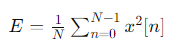



In [7]:
def energia(datos):
    canales, puntos, epocas=datos.shape
    energias_epoca = np.sum(datos**2, axis=1)
    energiasprom = np.mean(energias_epoca, axis=1)
    return energiasprom


#**2)** DataFrame de las energias medias de los canales de cada sujeto

##**Control**

###Se desarrolló un código que utiliza la función de evaluación de energía previamente mencionada para calcular la energía promedio de cada canal para cada sujeto. Los resultados se organizaron en un DataFrame, permitiendo una visualización clara y estructurada de la energía de los sujetos de control.

In [31]:
SujetosControl=[]
for i in range(len(control)):
    sujeto=energia(control[i])
    SujetosControl.append(sujeto)
SujetosControlDF=pd.DataFrame(SujetosControl,columns=['Canal 1','Canal 2','Canal 3','Canal 4','Canal 5','Canal 6','Canal 7','Canal 8'])
SujetosControlDF = SujetosControlDF.reset_index()
SujetosControlDF = SujetosControlDF.rename(columns={'index': 'Sujetos'})
# Aplicar colores personalizados al DataFrame
SujetosControlDF_styled = SujetosControlDF.style.set_table_styles(
    [
        {'selector': 'thead th',
         'props': [('background-color', '#3498db'),  # Color encabezados
                   ('color', 'white'),
                   ('font-weight', 'bold')]},

        # Estilo para el título
        {'selector': 'caption',
         'props': [('caption-side', 'top'),  # Mostrar el título arriba
                   ('font-size', '20px'),  # Tamaño de la fuente del título
                   ('background-color', '#3498db'),  # Color de fondo del título
                   ('color', 'white'),  # Color del texto del título
                   ('font-weight', 'bold'),  # Texto en negrita
                   ('text-align', 'center'),  # Alineación centrada
                   ('padding', '10px')]}  # Espaciado alrededor del título
    ]
).background_gradient(cmap='Blues').set_caption("Control")
SujetosControlDF_styled






,Sujetos,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
0,0,13180.109317,13925.217812,16218.994223,12324.883659,14060.300659,25767.024864,21935.759622,22827.781293
1,1,35311.301696,34916.686010,38800.429029,35427.031127,35905.472869,106598.128152,106885.575966,112520.750636
2,2,18510.829979,19738.489375,20911.792748,21828.254399,23351.992649,53086.059766,37495.972475,43067.095504
3,3,15966.402868,17617.810248,20804.937129,19654.400017,16678.982063,93894.049009,66862.496275,75685.125872
4,4,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
5,5,14148.673322,18283.999666,28749.932148,14270.726911,28787.445978,14661.417740,15940.154095,19499.898656
6,6,13352.558858,12079.042337,12056.752677,13537.102069,13418.269716,38883.704467,37960.013947,37046.836341
7,7,34036.502777,35276.242239,37728.034174,30403.012785,32255.024467,149804.923665,194218.587624,270161.157209
8,8,31250.507507,24222.776323,28298.111428,25378.777621,33079.452791,240835.102634,156030.040579,278095.358270
9,9,28551.124065,26204.839254,17383.998956,17244.605933,26206.372422,83370.618408,51121.105722,67852.348256


##**Parkinson**
###Se desarrolló un código que emplea la función de evaluación de energía previamente mencionada para calcular la energía promedio de cada canal en pacientes con Parkinson. Los resultados se organizaron en un DataFrame, facilitando una visualización clara y estructurada de la energía en los sujetos con Parkinson.

In [29]:
SujetosParkinson=[]
for i in range(len(parkinson)):
    sujeto=energia(parkinson[i])
    SujetosParkinson.append(sujeto)
SujetosParkinsonDF=pd.DataFrame(SujetosParkinson,columns=['Canal 1','Canal 2','Canal 3','Canal 4','Canal 5','Canal 6','Canal 7','Canal 8'])
SujetosParkinsonDF = SujetosParkinsonDF.reset_index()
SujetosParkinsonDF = SujetosParkinsonDF.rename(columns={'index': 'Sujetos'})
# Aplicar colores personalizados al DataFrame
SujetosParkinsonDF_styled = SujetosParkinsonDF.style.set_table_styles(
    [
        {'selector': 'thead th',
         'props': [('background-color', '#6a0dad'),  # Color encabezados
                   ('color', 'white'),
                   ('font-weight', 'bold')]},

        # Estilo para el título
        {'selector': 'caption',
         'props': [('caption-side', 'top'),  # Mostrar el título arriba
                   ('font-size', '20px'),  # Tamaño de la fuente del título
                   ('background-color', '#6a0dad'),  # Color de fondo del título
                   ('color', 'white'),  # Color del texto del título
                   ('font-weight', 'bold'),  # Texto en negrita
                   ('text-align', 'center'),  # Alineación centrada
                   ('padding', '10px')]}  # Espaciado alrededor del título
    ]
).background_gradient(cmap='Purples').set_caption("Parkinson")
SujetosParkinsonDF_styled


,Sujetos,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
0,0,29402.195610,31214.592172,30663.970154,24697.341514,25296.654765,67961.116232,74866.179511,103522.441839
1,1,38092.102574,43575.379457,41979.994799,41715.287990,46513.737045,251649.394709,179345.438488,262361.180410
2,2,22034.834171,21250.934562,27369.549841,13197.556268,18373.335858,85398.723929,59948.779883,72367.809030
3,3,10692.948223,10841.187262,12154.390086,24161.685202,14789.173543,43302.825848,42560.941845,39043.973220
4,4,23658.738825,23990.255991,30633.745996,22888.894132,19932.315538,65161.432397,60552.834862,58441.048743
5,5,48923.874237,64324.769523,85175.914992,78087.225852,65792.625436,458631.543464,400266.637762,554127.580214
6,6,23446.051598,26091.341850,36640.531850,25660.222773,31330.549186,93696.128392,67690.908167,111124.343428
7,7,17995.660058,12001.601821,12286.344400,14785.908284,17058.433161,63983.449318,53715.460772,66403.639479
8,8,12438.243570,11261.175800,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.065340
9,9,33900.139101,32395.467750,29194.827407,23439.114082,25040.406700,122738.018441,103327.500981,100845.843964


#**3)** Analisis Estadistico

##**Normalidad**

### Se llevó a cabo una prueba de normalidad para analizar la distribución de las variables en dos grupos de sujetos: el grupo de control y el grupo de pacientes con Parkinson. Este análisis permitió evaluar cómo se distribuyen las variables en cada grupo, lo que es crucial para determinar el tipo de prueba estadística adecuada a aplicar. Al entender la distribución de las variables, se puede elegir correctamente entre pruebas paramétricas y no paramétricas, asegurando la validez de los resultados y las conclusiones del estudio[2].

In [41]:
resultsP = {}
resultsC = {}
for channelP in SujetosParkinsonDF.columns:
    if channelP != "Sujetos":
      stat, p_value = shapiro(SujetosParkinsonDF[channelP])
      if p_value > 0.05:
        Razon= "Normal"
      else:
        Razon= "No Normal"
      resultsP[channelP] = {'Estadístico': stat, 'p-valor': p_value, "Distribucion" : Razon}
for channelC in SujetosControlDF.columns:
    if channelC != "Sujetos":
      stat, p_value = shapiro(SujetosControlDF[channelC])
      if p_value > 0.05:
        Razon= "Normal"
      else:
        Razon= "No Normal"
      resultsC[channelC] = {'Estadístico': stat, 'p-valor': p_value, "Distribucion" : Razon}
# Si necesitas guardar los resultados en un DataFrame
resultsC_df = pd.DataFrame(resultsC).T
resultsP_df = pd.DataFrame(resultsP).T
print(resultsC_df)
print("\n")
print(resultsP_df)

        Estadístico   p-valor Distribucion
Canal 1    0.909457  0.006253    No Normal
Canal 2    0.902333  0.003954    No Normal
Canal 3     0.91483  0.008902    No Normal
Canal 4    0.850648  0.000197    No Normal
Canal 5    0.875942    0.0008    No Normal
Canal 6    0.777802  0.000006    No Normal
Canal 7    0.769249  0.000004    No Normal
Canal 8    0.717092  0.000001    No Normal


        Estadístico   p-valor Distribucion
Canal 1    0.887956  0.014392    No Normal
Canal 2    0.861984  0.004522    No Normal
Canal 3    0.822825   0.00091    No Normal
Canal 4    0.794399  0.000312    No Normal
Canal 5    0.865751  0.005323    No Normal
Canal 6     0.68798   0.00001    No Normal
Canal 7    0.705881  0.000017    No Normal
Canal 8    0.684943  0.000009    No Normal


### Como se observó en los resultados de la prueba de normalidad, todos los datos presentaron una falta de normalidad. Esto indica que las distribuciones de las variables no siguen una distribución normal en ninguno de los grupos analizados. La falta de normalidad implica que los datos no cumplen con uno de los tres criterios fundamentales para aplicar análisis paramétricos, que son: (1) los datos deben seguir una distribución normal, (2) la homogeneidad de varianzas, y (3) la independencia de las observaciones. Dado que el primer criterio no se cumple, se debe considerar el uso de pruebas estadísticas no paramétricas, que no asumen normalidad y son más adecuadas para estos datos[3].


##**Homocedasticidad**

###Aunque la falta de normalidad ya sugiere que una prueba no paramétrica es la más adecuada, se llevó a cabo una prueba adicional para evaluar la homocedasticidad. La homocedasticidad se refiere a la suposición de que las varianzas de los errores o residuos son constantes a lo largo de los niveles de la variable independiente. En otras palabras, implica que la variabilidad de los datos es similar en todos los grupos o condiciones. Si los datos no cumplen con esta condición, puede indicar que la variabilidad en los datos es diferente en diferentes grupos, lo que podría afectar la validez de los resultados obtenidos mediante métodos estadísticos que asumen homocedasticidad. Por lo tanto, verificar la homocedasticidad es crucial para seleccionar la prueba estadística adecuada y asegurar que las inferencias sean válidas[4].

In [45]:
stat, p_value = levene(*[SujetosControlDF[channelC] for channelC in SujetosControlDF.columns])

print(f'Estadístico de Levene={stat:.4f}, p-valor={p_value:.4f}')
if p_value > 0.05:
    print('Las varianzas entre los canales son homogéneas.')
else:
    print('Las varianzas entre los canales no son homogéneas.')

stat, p_value = levene(*[SujetosParkinsonDF[channelP] for channelP in SujetosParkinsonDF.columns])

print(f'Estadístico de Levene={stat:.4f}, p-valor={p_value:.4f}')
if p_value > 0.05:
    print('Las varianzas entre los canales son homogéneas.')
else:
    print('Las varianzas entre los canales no son homogéneas.')

Estadístico de Levene=10.6639, p-valor=0.0000
Las varianzas entre los canales no son homogéneas.
Estadístico de Levene=5.1556, p-valor=0.0000
Las varianzas entre los canales no son homogéneas.


###Como se observó, ambos canales no cumplen con la condición de homocedasticidad, ya que las varianzas no son homogéneas. Esta violación adicional refuerza la recomendación de utilizar una prueba no paramétrica en lugar de una prueba paramétrica, dado que las pruebas paramétricas requieren que se cumplan las condiciones de normalidad y homocedasticidad para ser válidas.

##**Prueba T-Student**
###Se realizó una prueba T de Student como prueba paramétrica para evaluar las diferencias en la media de los canales entre los grupos de sujetos con Parkinson y el grupo de control. A pesar de que las condiciones de normalidad ya habían indicado que una prueba paramétrica podría no ser la más adecuada, la prueba se llevó a cabo para observar cómo varía la media de los canales en cada grupo. Este enfoque permite comparar la magnitud de las diferencias entre los grupos, aunque los resultados deben interpretarse con cautela debido a la violación de las suposiciones de normalidad y homocedasticidad[5].

In [46]:
canal_1 = SujetosParkinsonDF['Canal 1']
canal_2 = SujetosParkinsonDF['Canal 2']
canal_3 = SujetosControlDF['Canal 1']
canal_4 = SujetosControlDF['Canal 2']

stat, p_value = ttest_ind(canal_1, canal_2, equal_var=True)  # Suponiendo varianzas iguales
print(f'Estadístico t={stat:.4f}, p-valor={p_value:.4f}')
if p_value > 0.05:
    print('Las medias de los canales son iguales.')
else:
    print('Las medias de los canales son diferentes.')

stat, p_value = ttest_ind(canal_3, canal_4, equal_var=True)  # Suponiendo varianzas iguales
print(f'Estadístico t={stat:.4f}, p-valor={p_value:.4f}')
if p_value > 0.05:
    print('Las medias de los canales son iguales.')
else:
    print('Las medias de los canales son diferentes.')


Estadístico t=-0.2595, p-valor=0.7965
Las medias de los canales son iguales.
Estadístico t=-0.5647, p-valor=0.5741
Las medias de los canales son iguales.


###Como se puede observar, la prueba T de Student muestra una ligera concordancia entre las medias de los sujetos y los canales seleccionados. Sin embargo, dado que los parámetros de normalidad no garantizan la validez de esta prueba paramétrica, es necesario realizar una prueba no paramétrica para asegurar la precisión y la robustez de los resultados.

#**Prueba Mann-Whitney**

###La prueba de Mann-Whitney es una prueba no paramétrica que se utiliza como alternativa a la prueba T de Student cuando los datos no cumplen con los supuestos de normalidad. Esta prueba compara las medianas de dos grupos independientes para determinar si hay diferencias significativas entre ellos. Para verificar la validez de los resultados obtenidos con la prueba T de Student, se aplicó la prueba de Mann-Whitney a los mismos datos, tanto en el grupo de sujetos con Parkinson como en el grupo de control. Esto permite corroborar si los resultados de la prueba paramétrica fueron afectados por las violaciones a los supuestos de normalidad[4].

In [49]:
stat, p_value = mannwhitneyu(canal_1, canal_2, alternative='two-sided')  # Suponiendo varianzas iguales
print(f'Estadístico t={stat:.4f}, p-valor={p_value:.4f}')
if p_value > 0.05:
    print('Las medias de los canales son iguales.')
else:
    print('Las medias de los canales son diferentes.')

stat, p_value = mannwhitneyu(canal_3, canal_4, alternative='two-sided')  # Suponiendo varianzas iguales
print(f'Estadístico t={stat:.4f}, p-valor={p_value:.4f}')
if p_value > 0.05:
    print('Las medias de los canales son iguales.')
else:
    print('Las medias de los canales son diferentes.')

Estadístico t=257.0000, p-valor=0.8778
Las medias de los canales son iguales.
Estadístico t=607.0000, p-valor=0.6483
Las medias de los canales son iguales.


#**Referencias**
[1] (S/f-c). Fouladi.ir. Recuperado el 14 de septiembre de 2024, de https://file.fouladi.ir/courses/dsp/books/%28Prentice-Hall%20Signal%20Processing%20Series%29%20Alan%20V.%20Oppenheim%2C%20Ronald%20W.%20Schafer-Discrete-Time%20Signal%20Processing-Prentice%20Hall%20%282009%29.pdf


[2] Ghasemi, A., & Zahediasl, S. (2012). Normality tests for statistical analysis: A guide for non-statisticians. International Journal of Endocrinology and Metabolism, 10(2), 486–489. https://doi.org/10.5812/ijem.3505

[3] Hahs-Vaughn, D. L., & Lomax, R. G. (2020). An Introduction to Statistical Concepts (4a ed.). Routledge.

[4] (S/f). Sadbhavnapublications.org. Recuperado el 13 de septiembre de 2024, de https://sadbhavnapublications.org/research-enrichment-material/2-Statistical-Books/Discovering-Statistics-Using-IBM-SPSS-Statistics-4th-c2013-Andy-Field.pdf

[5] (S/f-a). Sadbhavnapublications.org. Recuperado el 13 de septiembre de 2024, de https://sadbhavnapublications.org/research-enrichment-material/2-Statistical-Books/Discovering-Statistics-Using-IBM-SPSS-Statistics-4th-c2013-Andy-Field.pdf



